# LEVEL-1

#### IMPORTING LIBRARIES

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [155]:
df = pd.read_csv('Dataset(1).csv')
df2=df.copy()
df3=df.copy()

In [156]:
df.sample(5)

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
511,MS,F,U,GT3,A,1,0.0,other,other,other,...,1,4,1.0,11,9.0,10,17.0,2.0,1.0,yes
256,GP,M,U,GT3,T,2,2.0,other,at_home,course,...,2,1,26.0,7,8.0,8,18.0,1.0,2.0,yes
491,MS,F,U,GT3,T,1,1.0,other,other,course,...,4,1,12.0,7,8.0,9,19.0,2.0,1.0,yes
573,MS,F,U,GT3,T,1,1.0,other,at_home,course,...,1,5,9.0,7,9.0,10,17.0,1.0,2.0,no
359,GP,F,R,GT3,T,3,4.0,at_home,services,course,...,2,5,2.0,15,15.0,17,17.0,3.0,5.0,no


### Converting categorical values to numerical ones

In [157]:
df['paid_numeric']=df['paid'].map({'yes': 1, 'no': 0})
df['internet_numeric']=df['internet'].map({'yes': 1, 'no': 0})
df['higher_numeric']=df['higher'].map({'yes': 1, 'no': 0})
df['activities_numeric']=df['activities'].map({'yes': 1, 'no': 0})

(array([103., 169., 170., 130.,  30.,   6.,   3.]),
 array([15., 16., 17., 18., 19., 20., 21., 22.]),
 <BarContainer object of 7 artists>)

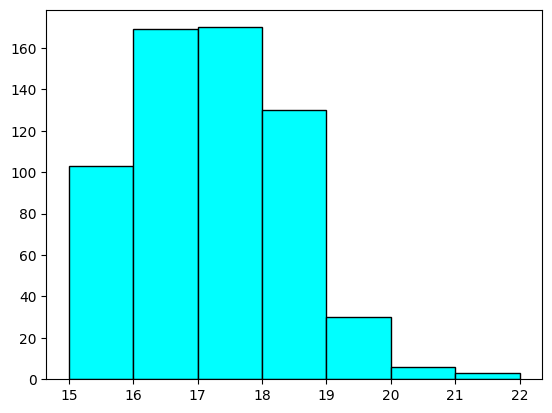

In [158]:
plt.hist(df['Feature_1'].dropna(),color='cyan',bins=7,edgecolor='black')

### Using Univarite Analysis we can deduce that the range of feature 1 lies from 15-22 inclusive from both sides and since we have the data of school students, it could possibly be Age or number of friends for a person or grades of another year/terms

### We will have to do some further analysis to decide

<Axes: xlabel='Feature_1', ylabel='failures'>

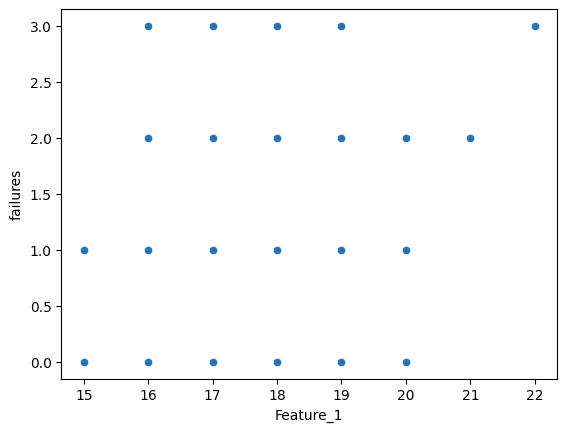

In [159]:
sns.scatterplot(x=df['Feature_1'], y=df['failures'])

<Axes: >

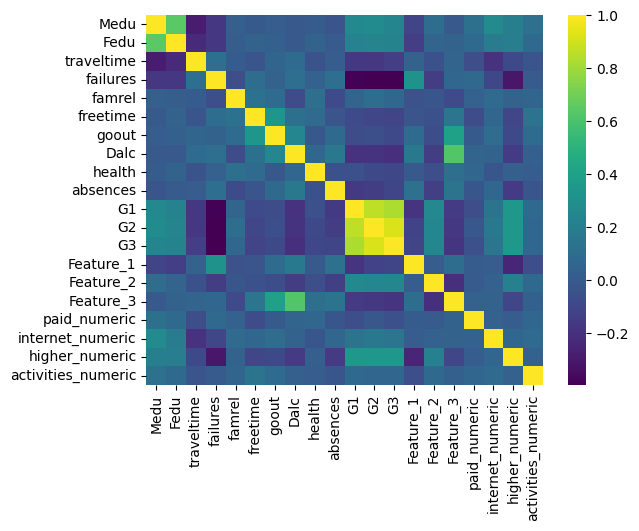

In [160]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix=numeric_df.corr()
sns.heatmap(corr_matrix,cbar=True,cmap='viridis')

### With the use of heat map of co-relation matrix feature_1 tends co-relate with failures, absences and Dalc

In [161]:
df['G3'].corr(df['Feature_1'])

np.float64(-0.10560952864428139)

In [162]:
df['failures'].corr(df['Feature_1'])


np.float64(0.3121506808864309)

### From the above generated co-relation between failures and Feature_1 we can clearly obeserve that they have high value emphasizing strong/moderate co-relation. Moreover the G1 is not at all related to feature_1 which denies its possibility of being some form of grades hence Feature 1 will be age

## CONCLUSION 1 : FEATURE_1 IS AGE

In [163]:
df['Feature_1'].corr(df['Feature_2'])


np.float64(0.014528422462738657)

### Such a small correlation between Feature 1 and Feature 2 which we obtained using bivariate analysis we can definitely say that Feature_2 will not be a physical feature since it is not much dependent on Feature_1 i.e., "AGE"

In [164]:
df['higher_numeric'].corr(df['Feature_2'])


np.float64(0.20685541734454463)

In [165]:
df['G3'].corr(df['Feature_2'])

np.float64(0.24988382521753116)

### These moderately high correlation suggests us that Feature_2 might be academic related like Grades or study time in a day. This is confirmed by strong co-relation present between feature_2 and G1,G2,G3 and higher_numeric on heatmap

<Axes: title={'center': 'Feature_2 Distribution'}, ylabel='count'>

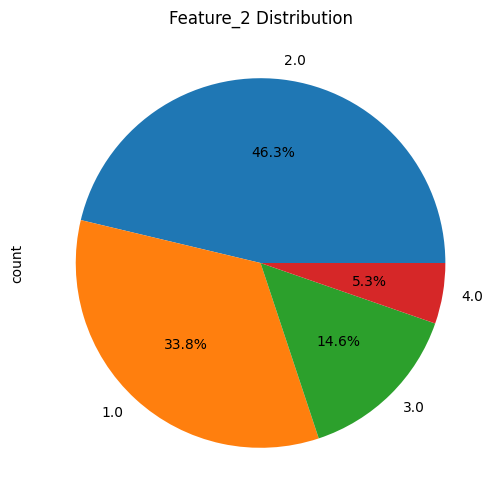

In [166]:
df['Feature_2'].dropna().value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), title='Feature_2 Distribution')


### The range of values of Feature_2 solidifies our claim of it being Grades or study time since there are very few students having the value 4 and a most of the students in the mid value i.e., 2 and a fewer number of students in the 1 bracket

<Axes: xlabel='Feature_2', ylabel='failures'>

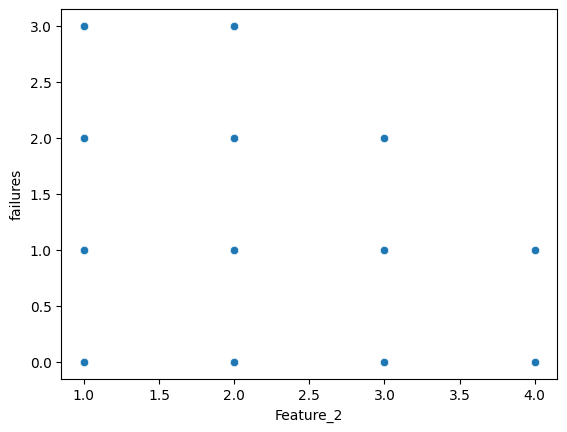

In [167]:
sns.scatterplot(x=df['Feature_2'], y=df['failures'])

### The scatter plot also confirms our claim as failures decreases with increase in feature_2, suggesting strongly that this could be study time

In [168]:
df['Feature_2'].corr(df['goout'])


np.float64(-0.06855222667347555)

### We can again see that this relation has very less correlation with going out which now provides enough proofs for our claim

### Hence we can say that Feature_2 is either Study time or Grades but since the scales of G1, G2 AND G3 do not match our claim of feature_2 being grades ,hence Feature_2 will be study time

## CONCLUSION 2 : FEATURE_2 IS STUDY TIME

In [169]:
df['Feature_1'].corr(df['Feature_3'])


np.float64(0.09715953504205523)

### Such a small value of the correlation of Feature_3 with Feature_1 again suggests that Feature_3 will not be any physical feature, as it is very less correlated with Feature_1 i.e., 'AGE'

In [170]:
(df['G1'].corr(df['Feature_3']),df['G2'].corr(df['Feature_3']),df['G3'].corr(df['Feature_3']))

(np.float64(-0.1524869603427029),
 np.float64(-0.1683476563610411),
 np.float64(-0.17572619304096462))

### A negative correlation of Feature_3 tells us that this feature will not be related to academics

In [171]:
df['goout'].corr(df['Feature_3'])


np.float64(0.39781065141509303)

### We have obtained a moderately high value for Feature_3's correlation with going out which suggests that this feature will be somehow related to sports or social activities

In [172]:
df['Dalc'].corr(df['Feature_3'])


np.float64(0.624373150224341)

### We have obtained a pretty high value for Feature_3's correlation with Daily alcohol consumption which totally rules out the possibibilty of Feature_3 being anyhow related to sports and maybe now even related to some health issues as well

<Axes: >

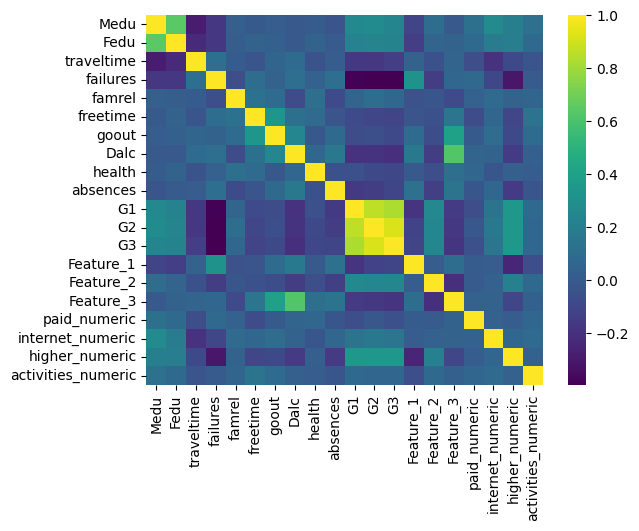

In [173]:
sns.heatmap(corr_matrix,cbar=True,cmap='viridis')

In [174]:
df['famrel'].corr(df['Feature_3'])


np.float64(-0.08294750178666843)

In [175]:
df['absences'].corr(df['Feature_3'])

np.float64(0.13877811821233246)

In [176]:
df['higher_numeric'].corr(df['Feature_3'])

np.float64(-0.10258096640087742)

### A negative co-relation between famrel and higher_numeric and a moderately positive one with absences depict that feature_3 can be partytime

## CONCLUSION 3 : FEATURE_3 IS THE TIME SPENT IN PARTIES WITH FRIENDS

# LEVEL-2

#### how many null values each variable has

In [177]:
df.isnull().sum()

school                 0
sex                    0
address                0
famsize               50
Pstatus                0
Medu                   0
Fedu                  73
Mjob                   0
Fjob                   0
reason                 0
guardian               0
traveltime            73
failures               0
schoolsup              0
famsup                 0
paid                   0
activities             0
nursery                0
higher                76
internet               0
famrel                 0
freetime              45
goout                  0
Dalc                   0
health                 0
absences              69
G1                     0
G2                    35
G3                     0
Feature_1             38
Feature_2             46
Feature_3             39
romantic               0
paid_numeric           0
internet_numeric       0
higher_numeric        76
activities_numeric     0
dtype: int64

#### which all variables have null values

In [178]:
[var for var in df.columns if df[var].isnull().sum()>0]

['famsize',
 'Fedu',
 'traveltime',
 'higher',
 'freetime',
 'absences',
 'G2',
 'Feature_1',
 'Feature_2',
 'Feature_3',
 'higher_numeric']

In [179]:
null_ratio = df.isnull().mean(axis=1)
dlt_rows = df[null_ratio > 0.5]
dlt_rows

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,G2,G3,Feature_1,Feature_2,Feature_3,romantic,paid_numeric,internet_numeric,higher_numeric,activities_numeric


#### No row with more than 50% data is empty, hence cannot be deleted

In [180]:
corr_matrix

,Medu,Fedu,traveltime,failures,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,paid_numeric,internet_numeric,higher_numeric,activities_numeric
Medu,1.000000,0.645266,-0.285188,-0.172210,0.024421,-0.006371,0.009536,-0.007018,0.004614,-0.030314,0.260472,0.272536,0.240151,-0.111327,0.097210,-0.009095,0.113973,0.266052,0.204609,0.119354
Fedu,0.645266,1.000000,-0.225239,-0.173993,0.015577,0.037076,0.028104,-0.011505,0.043708,0.000862,0.223507,0.234918,0.227617,-0.138840,0.051633,0.040817,0.077441,0.180960,0.189578,0.079223
traveltime,-0.285188,-0.225239,1.000000,0.102425,0.005246,-0.033022,0.053154,0.086628,-0.036147,0.011891,-0.169075,-0.170496,-0.138247,0.045970,-0.048797,0.052514,-0.064273,-0.193346,-0.083867,-0.028253
failures,-0.172210,-0.173993,0.102425,1.000000,-0.062645,0.097892,0.045078,0.105949,0.035588,0.104639,-0.384210,-0.392113,-0.393316,0.312151,-0.144468,0.063646,0.069416,-0.095330,-0.308991,0.000561
famrel,0.024421,0.015577,0.005246,-0.062645,1.000000,0.126353,0.089707,-0.075767,0.109559,-0.079048,0.048795,0.101754,0.063361,-0.040149,-0.018598,-0.082948,0.031937,0.082214,0.046003,0.057597
freetime,-0.006371,0.037076,-0.033022,0.097892,0.126353,1.000000,0.339153,0.116070,0.084181,-0.025629,-0.080949,-0.100257,-0.110870,-0.026015,-0.045388,0.149797,-0.075027,0.069010,-0.101445,0.137095
goout,0.009536,0.028104,0.053154,0.045078,0.089707,0.339153,1.000000,0.245126,-0.015741,0.077582,-0.074053,-0.061193,-0.087641,0.089430,-0.068552,0.397811,-0.006683,0.092869,-0.086903,0.088582
Dalc,-0.007018,-0.011505,0.086628,0.105949,-0.075767,0.116070,0.245126,1.000000,0.059067,0.165547,-0.195171,-0.187030,-0.204719,0.168583,-0.147515,0.624373,0.051986,0.042811,-0.148509,0.022592
health,0.004614,0.043708,-0.036147,0.035588,0.109559,0.084181,-0.015741,0.059067,1.000000,-0.045782,-0.051647,-0.088448,-0.098851,-0.007759,-0.062246,0.110179,0.063203,-0.022792,0.023616,0.013001
absences,-0.030314,0.000862,0.011891,0.104639,-0.079048,-0.025629,0.077582,0.165547,-0.045782,1.000000,-0.159026,-0.146747,-0.106241,0.119640,-0.133554,0.138778,-0.022323,0.065572,-0.151729,-0.018435


### From the correlation matrix we can see that 'absences' is not highly corelated with any other column and hence can be filled using mean method

### Same for feature_1

### Also 'traveltime' time is corelated with 'school' and 'address' but since they both contain only 2 values ,hence cannot be used to fill 'traveltime' .Therefore it will be filled using mean method

### Since Medu and Fedu are highly corelated it means we can fill the values with mean using group by method

### We can do same for 'G2' which is higly corelated with 'G2' and 'G3'

### Same for 'feature_3' which is corelated with 'Dalc'

### Same for 'feature_1' which is corelated to failures

### Since famsize is categorical data and not much corelated to any other field, we will it by mode method

### Same for higher

## For G2

<Axes: xlabel='G2', ylabel='Density'>

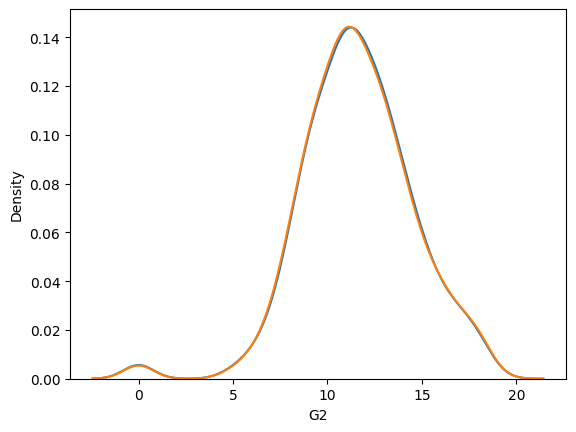

In [181]:
sns.kdeplot(df2['G2'])
df['G2'] = df['G2'].fillna(round(df.groupby('G1')['G2'].transform('mean')))
sns.kdeplot(df['G2'])

### We can clearly see that after filling the missing values the distribution did not change much ...hence we have filled values correctly

## For Feature_3

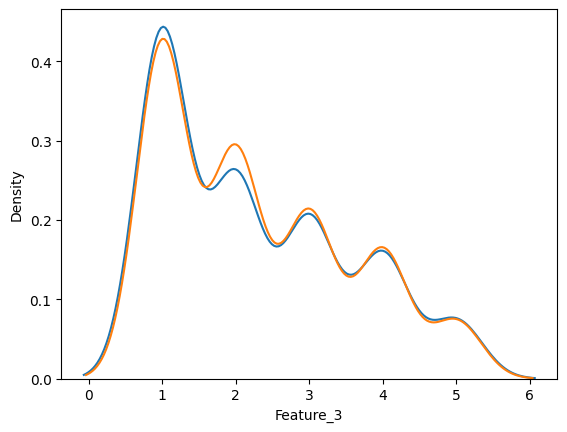

In [182]:
sns.kdeplot(df2['Feature_3'])
df['Feature_3'] = df['Feature_3'].fillna(round(df.groupby('Dalc')['Feature_3'].transform('mean')))
sns.kdeplot(df['Feature_3'])
plt.show()

### Same for 'feature_3' distribution remains same after filling the missing values

## For Feature_2

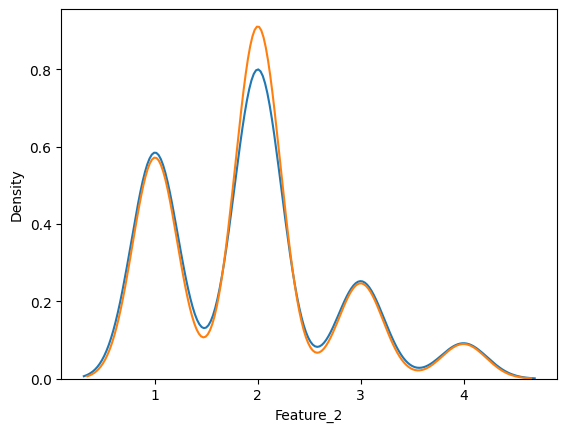

In [183]:
sns.kdeplot(df2['Feature_2'])
df['Feature_2']=df['Feature_2'].fillna(round(df['Feature_2'].mean()))
sns.kdeplot(df['Feature_2'])
plt.show()

### Very small change in distribution

## For Feature_1

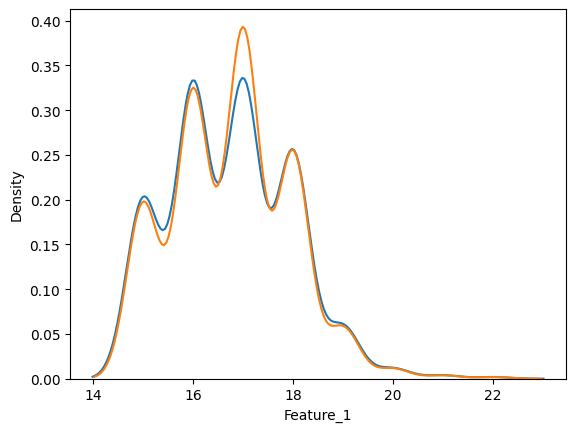

In [184]:
sns.kdeplot(df2['Feature_1'])
df['Feature_1'] = df['Feature_1'].fillna(round(df.groupby('failures')['Feature_1'].transform('mean')))
sns.kdeplot(df['Feature_1'])
plt.show()

### Slight change in distribution

## For absences

### Before filling missing values for absences using mean we will eliminaate outliers which can disturb the mean

### Before removing the outliers

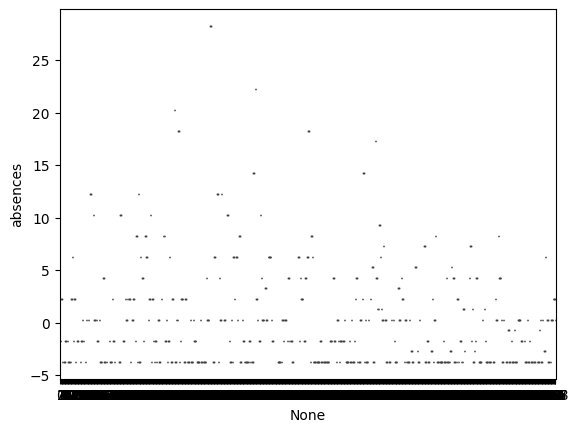

In [185]:
sns.boxplot(x=df.index, y=df['absences']-df['absences'].mean(),data=df)
plt.show()

In [186]:
Q1, Q3 = df['absences'].quantile([0.25, 0.75])
IQR = Q3 - Q1
df = df[(df['absences'] >= Q1 - 1.5 * IQR) & (df['absences'] <= Q3 + 1.5 * IQR)]

### After removing outliers

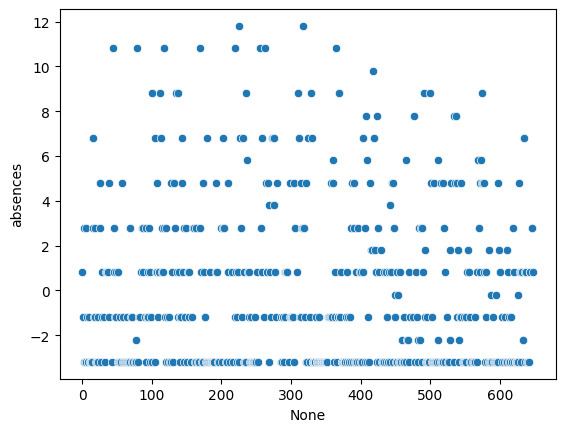

In [187]:
sns.scatterplot(x=df.index, y=df['absences']-df['absences'].mean(),data=df)
plt.show()

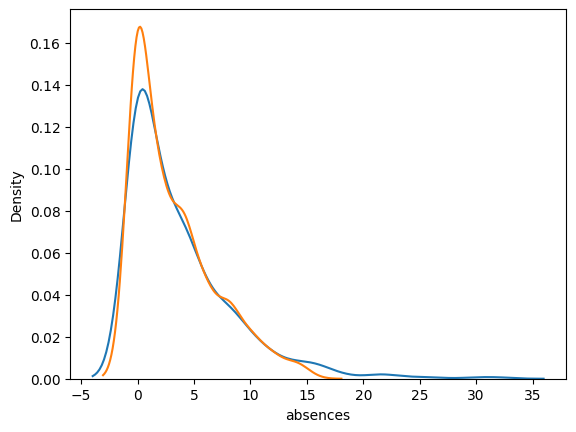

In [188]:
sns.kdeplot(df2['absences'])
df['absences']=df['absences'].fillna(round(df['absences'].mean()))
sns.kdeplot(df['absences'])
plt.show()

### Not much change in distribution hence correctly filled


## For Fedu

In [189]:
df['Fedu'].corr(df['Medu'])

np.float64(0.6488004788741605)

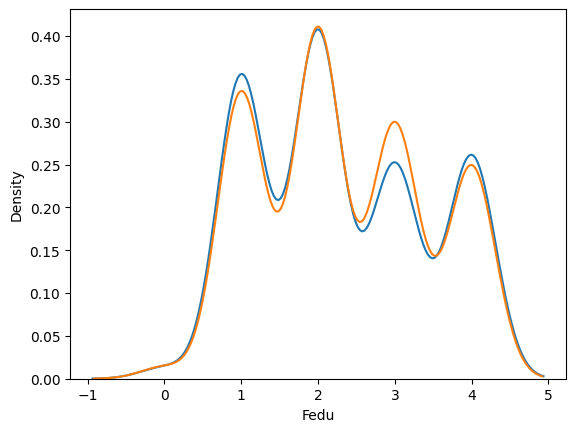

In [190]:
sns.kdeplot(df2['Fedu'])
df['Fedu'] = df['Fedu'].fillna(round(df.groupby('Medu')['Fedu'].transform('mean')))
sns.kdeplot(df['Fedu'])
plt.show()

### Slight change in distribution but that will work

## For traveltime

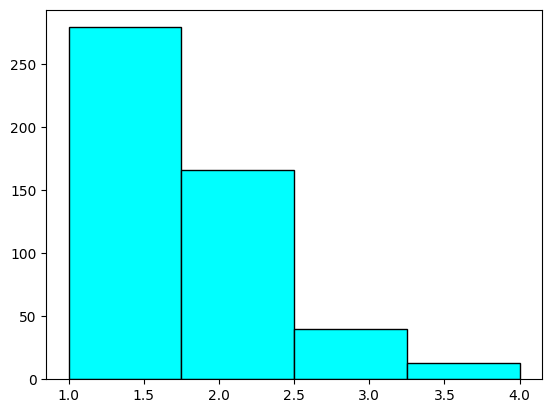

In [191]:
plt.hist(df['traveltime'].dropna(),color='cyan',bins=4,edgecolor='black')
plt.show()

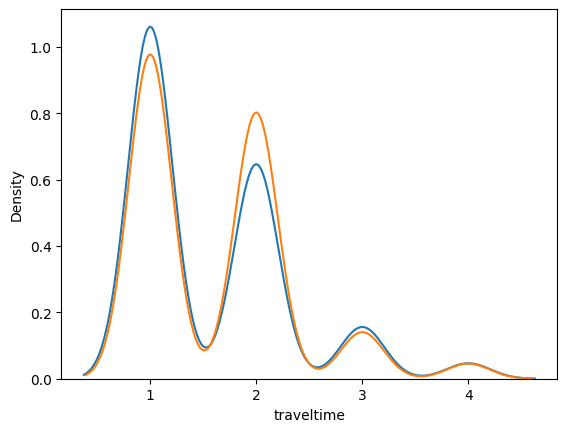

In [192]:
sns.kdeplot(df2['traveltime'])
df['traveltime']=df['traveltime'].fillna(round(df['traveltime'].mean()))
sns.kdeplot(df['traveltime'])
plt.show()

### Slight change in distribution

## For freetime

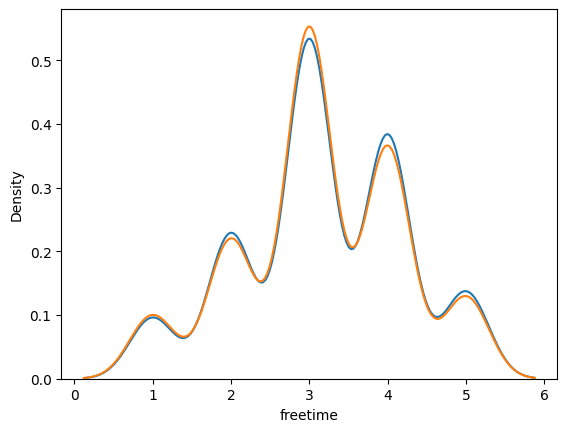

In [193]:
sns.kdeplot(df2['freetime'])
df['freetime'] = df['freetime'].fillna(round(df.groupby('goout')['freetime'].transform('mean')))
sns.kdeplot(df['freetime'])
plt.show()

### Negligible change in distribution

## For famsize

In [194]:
df['famsize'] = df['famsize'].fillna(df['famsize'].mode()[0])

## For higher

In [195]:
df['higher'] = df['higher'].fillna(df['higher'].mode()[0])

In [196]:
df=df.drop(['higher_numeric'],axis=1)
df.isnull().sum()

school                0
sex                   0
address               0
famsize               0
Pstatus               0
Medu                  0
Fedu                  0
Mjob                  0
Fjob                  0
reason                0
guardian              0
traveltime            0
failures              0
schoolsup             0
famsup                0
paid                  0
activities            0
nursery               0
higher                0
internet              0
famrel                0
freetime              0
goout                 0
Dalc                  0
health                0
absences              0
G1                    0
G2                    0
G3                    0
Feature_1             0
Feature_2             0
Feature_3             0
romantic              0
paid_numeric          0
internet_numeric      0
activities_numeric    0
dtype: int64

# LEVEL-3

### Though we have achieved this objective somewhat in level 1 only but here are also some more insights

## 1. Does alcohol affect grades

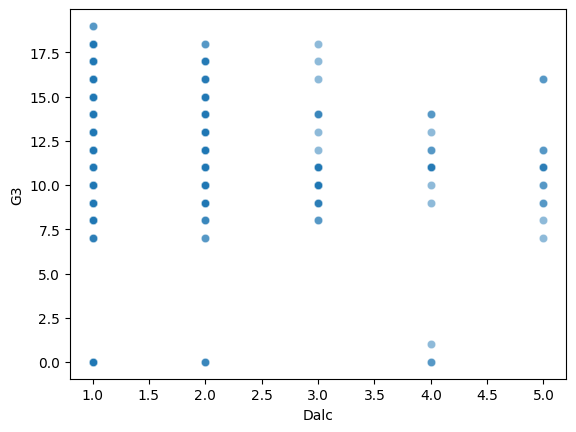

In [197]:

sns.scatterplot(x='Dalc', y='G3', data=df,alpha=0.5)
plt.show()

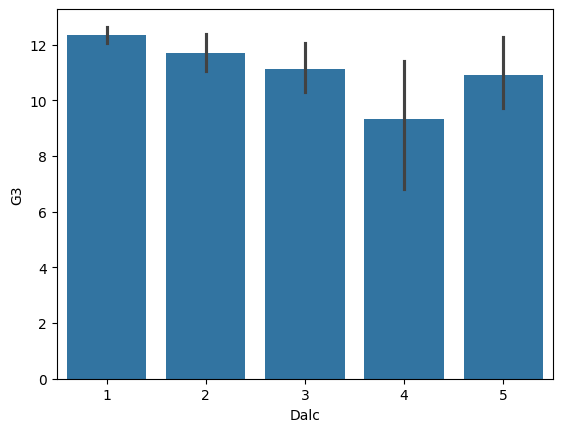

In [198]:
sns.barplot(x='Dalc', y='G3', data=df)
plt.show()

### we can clearly see decline in grades with daily alcohol consumption and a large variation with increase in Daily alcohol consumption

## 2. How is relationship affected by extracurricular activities

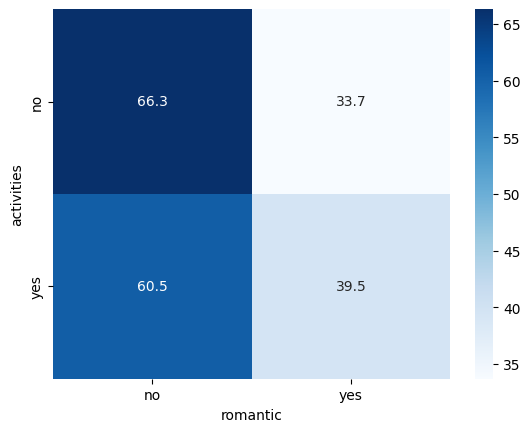

In [199]:
ct = pd.crosstab(df['activities'], df['romantic'],normalize='index')* 100
sns.heatmap(ct, annot=True, cmap="Blues", fmt='.1f')
plt.show()

### This draws the conclusion that relationship does not related with extracurricular activites as people with no activites and are not in relationship is almost same as people with activites and are not in relationship same goes with those who are in relationship

## 3. What % of people are in relationship

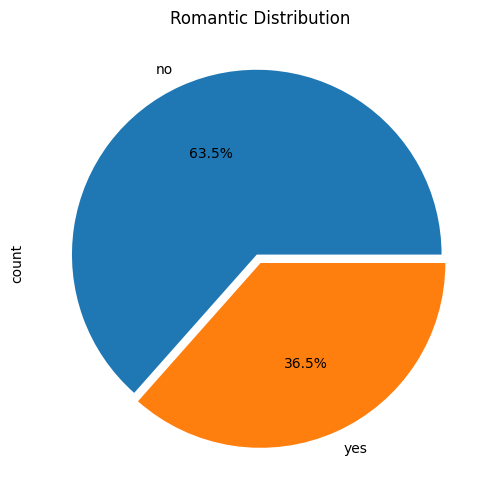

In [200]:
df['romantic'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6),explode = [0.05, 0] , title='Romantic Distribution')
plt.show()

### As we can see very less people are in relationship(36.8%)

## 4. How is relationship affected by Alcohol consumption and party time(feature_3) 

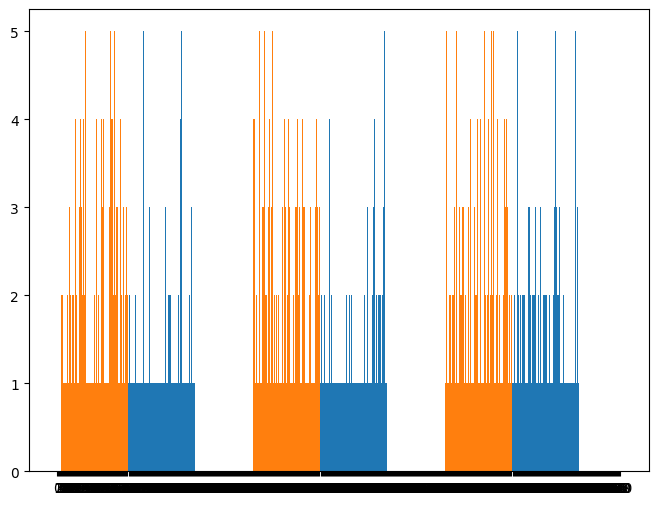

In [201]:
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.35
x = np.arange(len(df['romantic']))
rects1 = ax.bar(x - width/2, df['Dalc'], width, label='Dalc')
rects2 = ax.bar(x + width/2, df['Feature_3'], width, label='Feature_3')
ax.set_xticks(x)
plt.show()

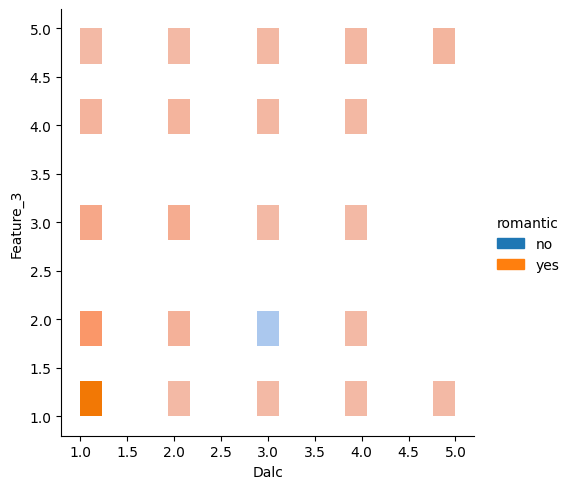

In [202]:
sns.displot(data=df, x="Dalc", hue="romantic", y="Feature_3")
plt.show()


### From this we can see that no suck corelation exists with daily alcohol consumption and party time with romantic relationship

In [203]:
df['Dalc'].corr(df['romantic'].map({"yes": 1, "no": 0}))

np.float64(0.06077615285455271)

In [204]:
df['Feature_3'].corr(df['romantic'].map({"yes": 1, "no": 0}))

np.float64(0.00038670302419115316)

### our conclusion is correct

## 5. How is relationship dependent on age(feature_1)

<Axes: xlabel='romantic', ylabel='Feature_1'>

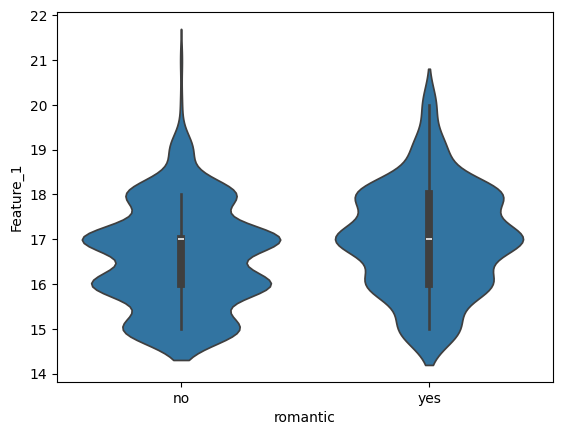

In [205]:
sns.violinplot(x='romantic', y='Feature_1', data=df)

### THe plot for YES tends to stretch towards higher age and gets little narrower from midean section, indicating that number of people of higher age who are in relationship is more than that are not in relationship
### It also shows that people of 16 contribute most to non romatic relationship 

# LEVEL-4

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### traveltime,paid,internet,nursery,Feature_3,Fjob,G1,absences,address,goout,health have very less corelation or negative corelation with romantic

In [207]:
df['traveltime'].corr(df['romantic'].map({"yes": 1, "no": 0}))

np.float64(-0.006000664003820555)

In [208]:
df['G1'].corr(df['romantic'].map({"yes": 1, "no": 0}))

np.float64(-0.06388939568706001)

In [209]:
df['absences'].corr(df['romantic'].map({"yes": 1, "no": 0}))

np.float64(0.0694146421831516)

In [210]:
df['address'].map({"U": 1, "R": 0}).corr(df['romantic'].map({"yes": 1, "no": 0}))

np.float64(-0.025272589638906395)

In [211]:
df['goout'].corr(df['romantic'].map({"yes": 1, "no": 0}))

np.float64(0.01493861711364431)

In [212]:
df['paid'].map({"yes": 1, "no": 0}).corr(df['romantic'].map({"yes": 1, "no": 0}))

np.float64(-0.006581581467603189)

In [213]:
df['internet'].map({"yes": 1, "no": 0}).corr(df['romantic'].map({"yes": 1, "no": 0}))

np.float64(0.020867261148871174)

In [214]:
df2['nursery'].map({"yes": 1, "no": 0}).corr(df['romantic'].map({"yes": 1, "no": 0}))

np.float64(-0.00749531688995864)

In [215]:
df['Feature_3'].corr(df['romantic'].map({"yes": 1, "no": 0}))

np.float64(0.00038670302419115316)

In [216]:
df['health'].corr(df['romantic'].map({"yes": 1, "no": 0}))

np.float64(-0.0018001856033184054)

### We will get cleaned datset after removing these columns from the given dataset

In [217]:
df = df.drop(columns=['health', 'Feature_3', 'nursery','internet','paid','goout','address','absences','G1','traveltime'],axis=1)
X = df.drop('romantic', axis=1)
y = df['romantic']

In [218]:
df['sex'] = df['sex'].map({'M': 0, 'F': 1})
df['school'] = df['school'].map({'GP': 0, 'MS': 1})
df['famsize'] = df['famsize'].map({'LE3': 0, 'GT3': 1})
df['Pstatus'] = df['Pstatus'].map({'T': 0, 'A': 1})
df['Mjob'] = df['Mjob'].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4})
df['Fjob'] = df['Fjob'].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4})
df['reason'] = df['reason'].map({'course': 0, 'home': 1, 'other': 2, 'reputation': 3})
df['guardian'] = df['guardian'].map({'father': 0, 'mother': 1, 'other': 2})
df['schoolsup'] = df['schoolsup'].map({'no': 0, 'yes': 1})
df['famsup'] = df['famsup'].map({'no': 0, 'yes': 1})
df['activities'] = df['activities'].map({'no': 0, 'yes': 1})
df['higher'] = df['higher'].map({'no': 0, 'yes': 1})
df['romantic'] = df['romantic'].map({'no': 0, 'yes': 1})

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")